# Collect data

In [36]:
import pandas as pd

symptoms_only_train_df = pd.read_csv('data/symptoms-only-train.csv')
symptoms_only_test_df = pd.read_csv('data/symptoms-only-test.csv')

symptoms_with_conditions_train_df = pd.read_csv('data/symptoms-with-conditions-train.csv')
symptoms_with_conditions_test_df = pd.read_csv('data/symptoms-with-conditions-test.csv')

# Evaluate symptoms only performance

## Setup model

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy')

## Arrange train and test data

In [38]:
X_train, y_train, X_test, y_test = (
    symptoms_only_train_df.drop("classificacaoFinal", axis=1),
    symptoms_only_train_df["classificacaoFinal"],
    symptoms_only_test_df.drop("classificacaoFinal", axis=1),
    symptoms_only_test_df["classificacaoFinal"]
)

## Find best model

In [ ]:
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

## Visualize tree


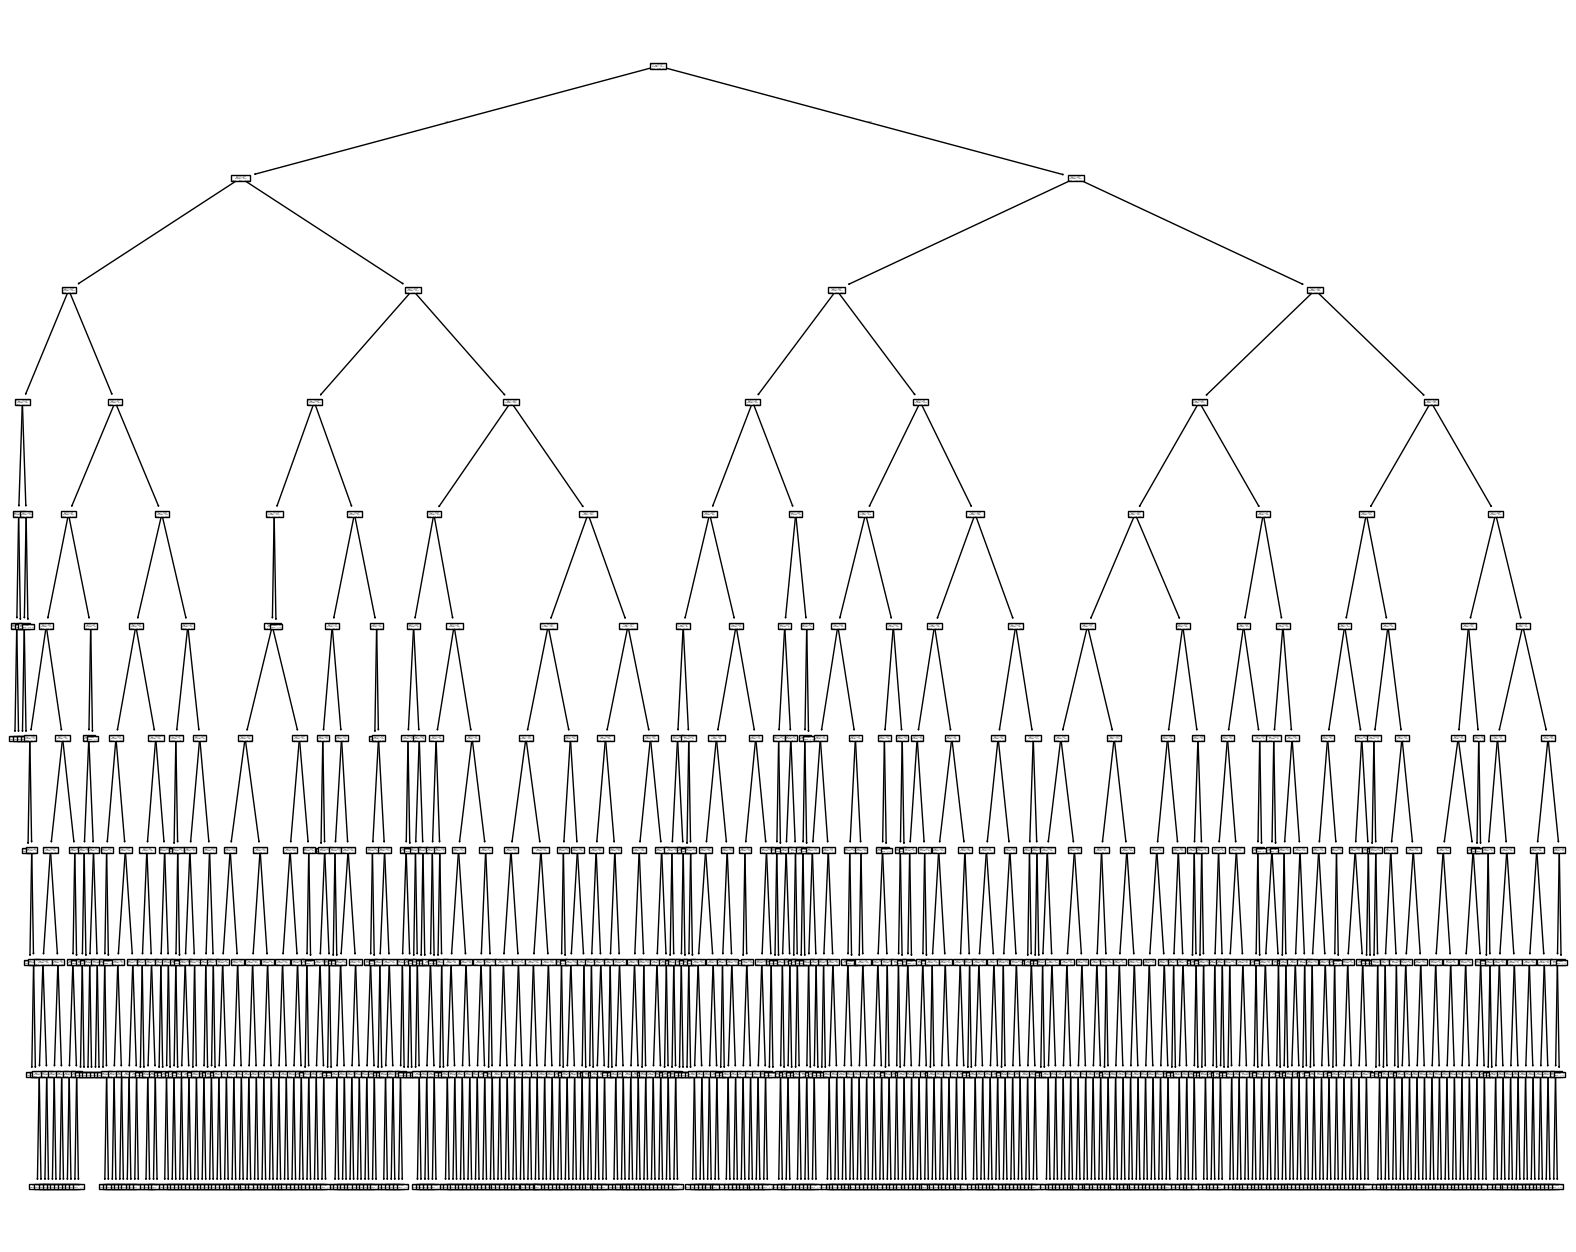

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
plot_tree(best_model)
plt.show()

## Visualize confusion matrix

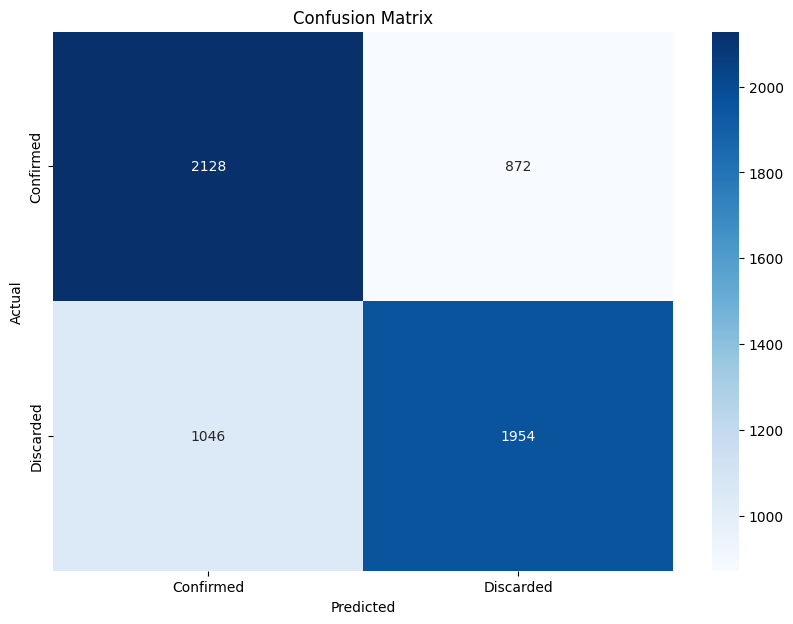

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 7))
sns.heatmap(
    confusion_matrix(y_true=y_test, y_pred=y_pred),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Confirmed", "Discarded"],
    yticklabels=["Confirmed", "Discarded"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Visualize performance metrics radar

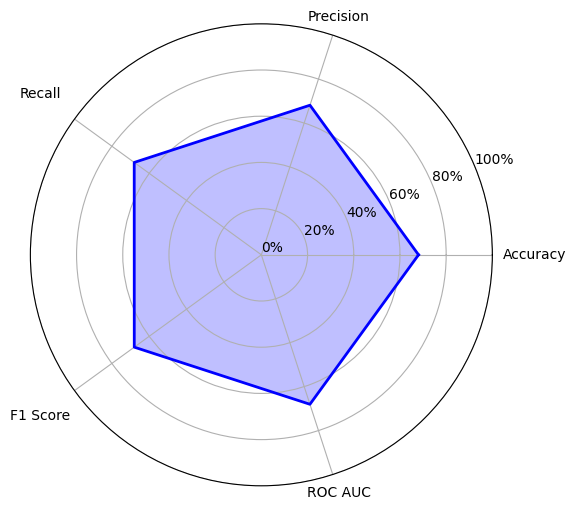

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

report = classification_report(y_true=y_test, y_pred=y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_pred) * 100

metrics = {
    "Accuracy": report["accuracy"] * 100,
    "Precision": report["weighted avg"]["precision"] * 100,
    "Recall": report["weighted avg"]["recall"] * 100,
    "F1 Score": report["weighted avg"]["f1-score"] * 100,
    "ROC AUC": roc_auc
}

labels = list(metrics.keys())
values = list(metrics.values())

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

values += values[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color="blue", alpha=0.25)
ax.plot(angles, values, color="blue", linewidth=2)

ax.set_yticks(np.arange(0, 101, 20))
ax.set_yticklabels([f'{i}%' for i in np.arange(0, 101, 20)])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(
    labels,
)

for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
    if label.get_text() in ["Accuracy", "Recall", "F1 Score"]:
        label.set_rotation(45)
        label.set_rotation_mode('anchor')
        label.set_va('center')
        label.set_ha('center')
        label.set_position((label.get_position()[0], label.get_position()[1] + -0.1))

plt.show()